<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/003(Conv2D_Digit_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test)=dataset.load_data()
X_train.shape
Y_test.shape

(10000,)

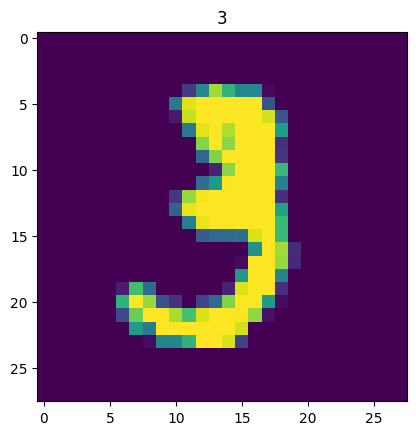

In [3]:
#Vislualize
index=10
plt.imshow(X_train[index])
plt.title(Y_train[index])
plt.show()

In [4]:
X_train, X_test=X_train/255.0, X_test/255.0

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs["accuracy"]>0.97):
      self.model.stop_training=True

In [7]:
#Lenet-5 Architecture
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(28,28,1)),
                           tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),
                           tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=120, activation="relu"),
                           tf.keras.layers.Dense(units=10, activation="softmax")
                           ])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1976 - accuracy: 0.9397
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0666 - accuracy: 0.9795


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [9]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0498 - accuracy: 0.9838


[0.049803800880908966, 0.9837999939918518]